# Business Case: Predict whether a patient is having heart disease or not

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
data_x = pd.read_csv('values.csv')
data_y = pd.read_csv('labels.csv')

### Basic Checks

In [3]:
data_x.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
data_x.drop('patient_id', axis = 1, inplace =True)

In [5]:
data_x.rename(columns = {'slope_of_peak_exercise_st_segment' : 'slope', 'resting_blood_pressure' : 'bp', 'chest_pain_type' : 'cp', 'num_major_vessels' : 'major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl' : 'blood_sugar', 'resting_ekg_results' : 'rest_ecg', 'serum_cholesterol_mg_per_dl' : 'cholesterol', 'oldpeak_eq_st_depression' : 'oldpeak', 'max_heart_rate_achieved' : 'heart_rate', 'exercise_induced_angina' : 'angina'}, inplace = True)

In [6]:
data_x.head()

,slope,thal,bp,cp,major_vessels,blood_sugar,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [7]:
data_y.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [8]:
data_y.rename(columns = {'patient_id' : 'id', 'heart_disease_present' : 'target'}, inplace = True)
data_y.head()

,id,target
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [9]:
data_x.shape

(180, 13)

In [10]:
data_y.shape

(180, 2)

In [11]:
data_x.describe()

,slope,bp,cp,major_vessels,blood_sugar,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [12]:
data_y.describe()

,target
count,180.000000
mean,0.444444
std,0.498290
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   slope          180 non-null    int64  
 1   thal           180 non-null    object 
 2   bp             180 non-null    int64  
 3   cp             180 non-null    int64  
 4   major_vessels  180 non-null    int64  
 5   blood_sugar    180 non-null    int64  
 6   rest_ecg       180 non-null    int64  
 7   cholesterol    180 non-null    int64  
 8   oldpeak        180 non-null    float64
 9   sex            180 non-null    int64  
 10  age            180 non-null    int64  
 11  heart_rate     180 non-null    int64  
 12  angina         180 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 18.4+ KB


In [14]:
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      180 non-null    object
 1   target  180 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [15]:
data_x.isnull().sum()

slope            0
thal             0
bp               0
cp               0
major_vessels    0
blood_sugar      0
rest_ecg         0
cholesterol      0
oldpeak          0
sex              0
age              0
heart_rate       0
angina           0
dtype: int64

In [16]:
data_y.isnull().sum()

id        0
target    0
dtype: int64

**There are no missing values**

In [17]:
data_y['target'].unique()

array([0, 1], dtype=int64)

In [18]:
#Clearly, this is a classification problem, with the target variable having values '0' and '1

### Checking correlation between columns

In [19]:
data = pd.concat([data_x, data_y['target']], axis = 1)
data

,slope,thal,bp,cp,major_vessels,blood_sugar,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina,target
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [20]:
data.corr()['target'].abs().sort_values(ascending=False)

target           1.000000
angina           0.448647
major_vessels    0.421519
cp               0.412829
oldpeak          0.382930
heart_rate       0.375352
slope            0.344224
sex              0.335421
rest_ecg         0.145933
age              0.138255
cholesterol      0.079775
bp               0.078506
blood_sugar      0.003379
Name: target, dtype: float64

**This shows that most columns are moderately correlated with target, but 'blood_sugar' is very weakly correlated.**

# Exploratory Data Analysis (EDA)

### Analysing the target variable:

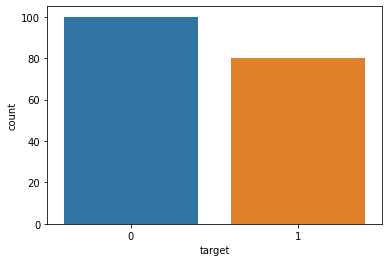

0    100
1     80
Name: target, dtype: int64


In [21]:
y = data_y['target']
sns.countplot(y)
plt.show()
temp = data['target'].value_counts()
print(temp)

In [22]:
print("Percentage of patients without heart problems: "+str(round(temp[0]*100/180,2)))
print("Percentage of patients with heart problems: "+str(round(temp[1]*100/180,2)))

Percentage of patience without heart problems: 55.56
Percentage of patience with heart problems: 44.44


### Analysing the slope Feature

In [23]:
data['slope'].unique()

array([1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

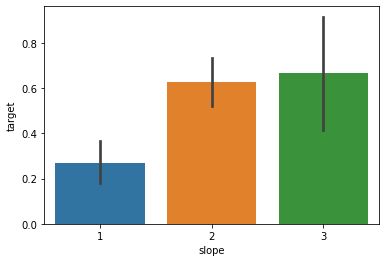

In [24]:
sns.barplot(data["slope"],y)

**People with slope value 3 have more chances of getting heart disease**

### Analysing thal feature

In [25]:
data['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

<AxesSubplot:xlabel='thal', ylabel='target'>

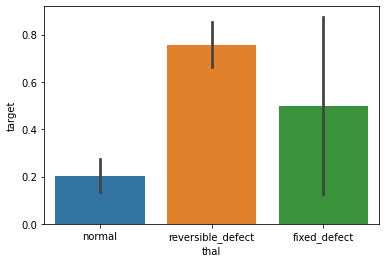

In [26]:
sns.barplot(data["thal"],y)

**People with reversible defect are the majority having heart diseases.**

### Analysing cp Feature

In [27]:
data.cp.unique()

array([2, 3, 4, 1], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

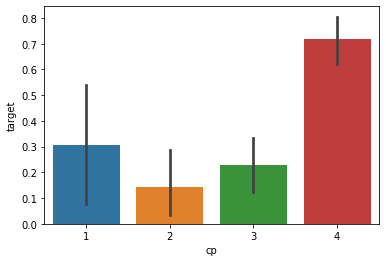

In [28]:
sns.barplot(data["cp"],y)

**People with chest pain type 4 have heart diseases the most.**

### Analysing major_vessels Feature

In [29]:
#number of major vessels (0-3) colored by flourosopy

In [30]:
data.major_vessels.unique()

array([0, 3, 2, 1], dtype=int64)

<AxesSubplot:xlabel='major_vessels', ylabel='count'>

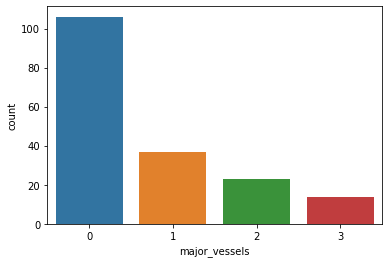

In [31]:
sns.countplot(data['major_vessels'])

<AxesSubplot:xlabel='major_vessels', ylabel='target'>

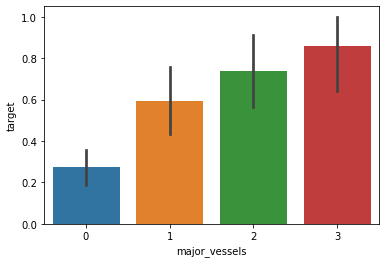

In [32]:
sns.barplot(data['major_vessels'],y)

**People with 3 major vessels are more prone to heart diseases.**

### Analysing blood_sugar Feature

In [33]:
data.blood_sugar.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='blood_sugar', ylabel='count'>

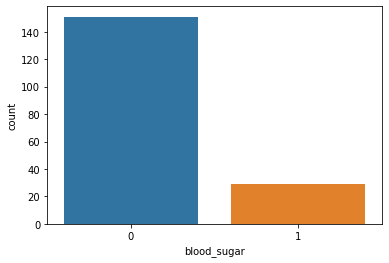

In [34]:
sns.countplot(data['blood_sugar'])

<AxesSubplot:xlabel='blood_sugar', ylabel='target'>

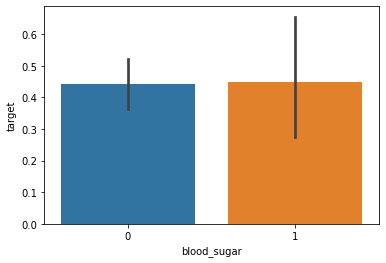

In [35]:
sns.barplot(data['blood_sugar'],y)

**Fasting blood sugar doesn't have much effect on heart disease.**

### Analysing rest_ecg Feature

In [36]:
data.rest_ecg.unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='rest_ecg', ylabel='count'>

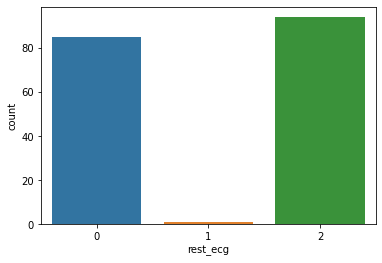

In [37]:
sns.countplot(data['rest_ecg'])

<AxesSubplot:xlabel='rest_ecg', ylabel='target'>

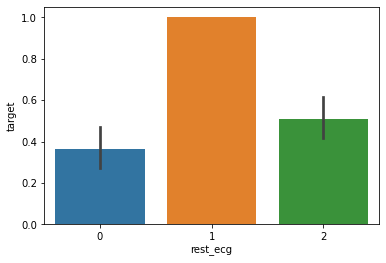

In [38]:
sns.barplot(data['rest_ecg'],y)

**People with resting electrocardiographic value 1 are more likely to have heart disease.**

### Analysing sex Feature

In [39]:
data.sex.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='count'>

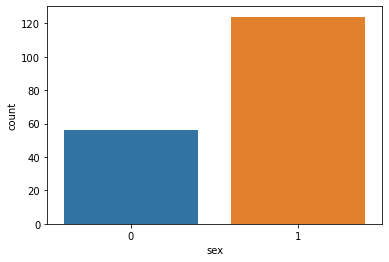

In [40]:
sns.countplot(data['sex'])

<AxesSubplot:xlabel='sex', ylabel='target'>

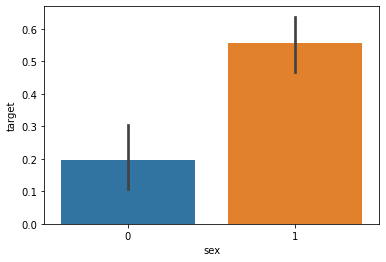

In [41]:
sns.barplot(data['sex'],y)

**Males have more than 2 times chance to get heart disease when compared to females.**

### Analysing angina Feature

In [42]:
data.angina.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='angina', ylabel='count'>

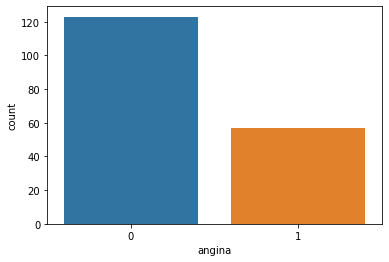

In [43]:
sns.countplot(data['angina'])

<AxesSubplot:xlabel='angina', ylabel='target'>

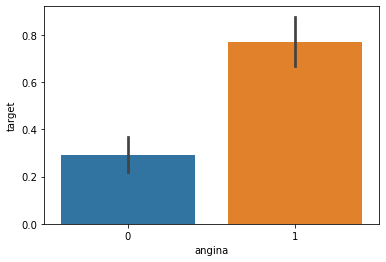

In [44]:
sns.barplot(data['angina'],y)

**Patients having excercise induced chest pain are more prone to heart diseases.**

## Handling the Categorical Features

In [45]:
# Since thal is a nominal categorical data, we will perform OneHotEncoding

thal = data[['thal']]
thal = pd.get_dummies(thal, drop_first = True)
thal.head()

,thal_normal,thal_reversible_defect
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [46]:
# Concatenating dataframe - data + thal

data = pd.concat([data,thal], axis = 1)
data.head()

,slope,thal,bp,cp,major_vessels,blood_sugar,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina,target,thal_normal,thal_reversible_defect
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,1,0
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


In [47]:
data.drop('thal', axis = 1, inplace = True)
data.head()

,slope,bp,cp,major_vessels,blood_sugar,rest_ecg,cholesterol,oldpeak,sex,age,heart_rate,angina,target,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


# Feature Selection

In [48]:
data.columns

Index(['slope', 'bp', 'cp', 'major_vessels', 'blood_sugar', 'rest_ecg',
       'cholesterol', 'oldpeak', 'sex', 'age', 'heart_rate', 'angina',
       'target', 'thal_normal', 'thal_reversible_defect'],
      dtype='object')

In [49]:
X = data.drop("target",axis=1)
Y = data["target"]

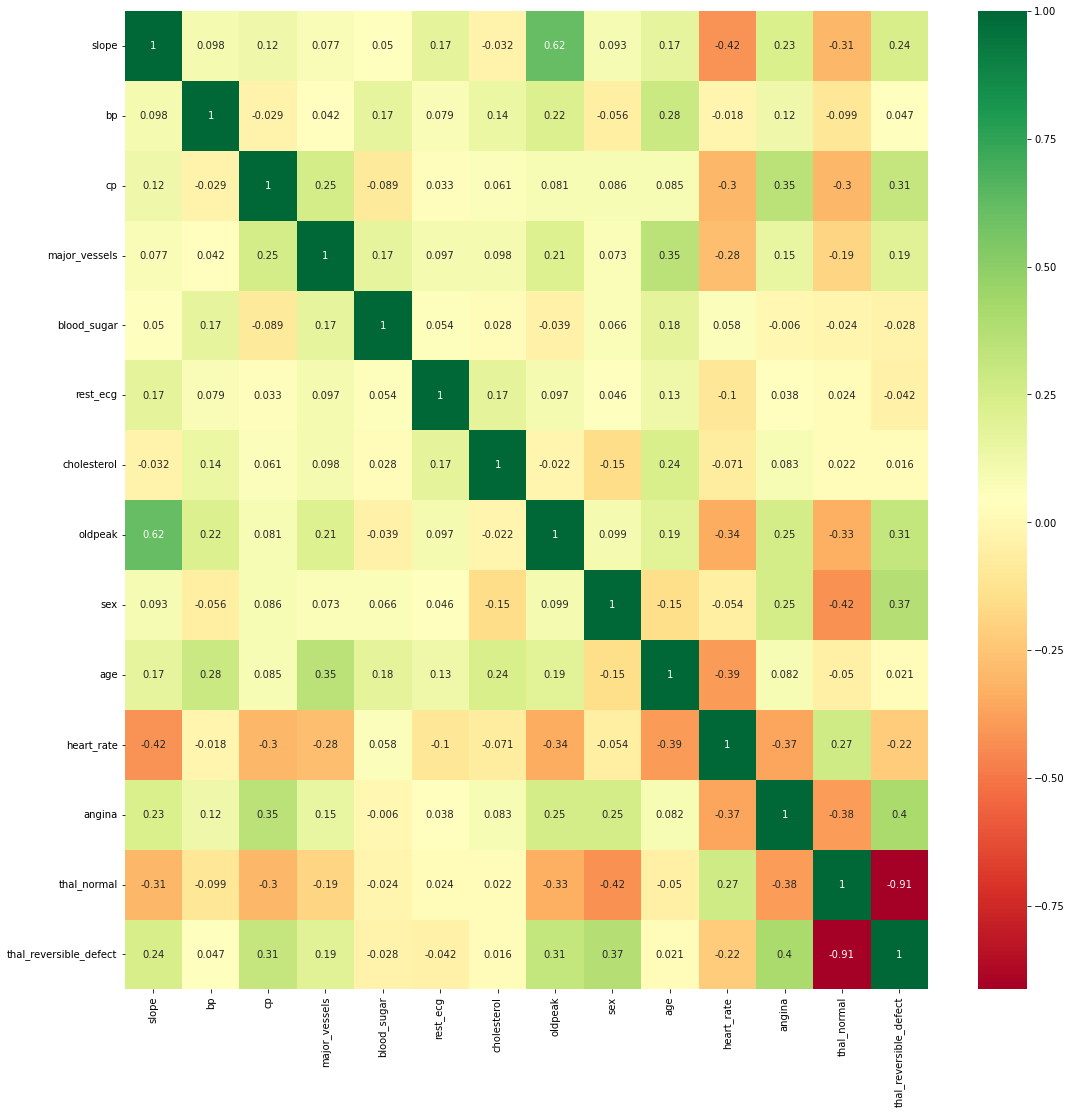

In [50]:
plt.figure(figsize = (18,18))
sns.heatmap(X.corr(), annot = True, cmap = "RdYlGn")
plt.show()

**There are no redundant features.**

# Model Creation

## Train Test Split

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=45)

In [52]:
X_train.shape

(144, 14)

In [53]:
Y_train.shape

(144,)

In [54]:
X_test.shape

(36, 14)

In [55]:
Y_test.shape

(36,)

# Model Fitting

In [56]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [58]:
Y_pred_lr.shape

(36,)

In [59]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.11 %


# Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [61]:
Y_pred_nb.shape

(36,)

In [62]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 80.56 %


# SVM

In [63]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)


In [64]:
Y_pred_svm.shape

(36,)

In [65]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.33 %


# K Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [67]:
Y_pred_knn.shape

(36,)

In [68]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 58.33 %


# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [70]:
print(Y_pred_dt.shape)

(36,)


In [71]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 91.67 %


# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [73]:
Y_pred_rf.shape

(36,)

In [74]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.11 %


# XGBoost

In [75]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [76]:
Y_pred_xgb.shape

(36,)

In [77]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.33 %


# Neural Network

In [78]:
from keras.models import Sequential
from keras.layers import Dense

In [79]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=14))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [80]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
5/5 [==============================] - 1s 2ms/step - loss: 4.1391 - accuracy: 0.4583
Epoch 2/300
5/5 [==============================] - 0s 1ms/step - loss: 2.6391 - accuracy: 0.3333
Epoch 3/300
5/5 [==============================] - 0s 2ms/step - loss: 2.7576 - accuracy: 0.3958
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 2.7354 - accuracy: 0.3681
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 2.4290 - accuracy: 0.3472
Epoch 6/300
5/5 [==============================] - 0s 2ms/step - loss: 2.3547 - accuracy: 0.3472
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 2.3318 - accuracy: 0.3333
Epoch 8/300
5/5 [==============================] - 0s 2ms/step - loss: 2.2344 - accuracy: 0.3542
Epoch 9/300
5/5 [==============================] - 0s 2ms/step - loss: 2.1924 - accuracy: 0.3542
Epoch 10/300
5/5 [==============================] - 0s 2ms/step - loss: 2.1654 - accuracy: 0.3403
Epoch 11/300
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8403
Epoch 168/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8056
Epoch 169/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8125
Epoch 170/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8125
Epoch 171/300
5/5 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8125
Epoch 172/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8125
Epoch 173/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8403
Epoch 174/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8472
Epoch 175/300
5/5 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8194
Epoch 176/300
5/5 [==============================] - 0s 4ms/step - loss: 0.4201 - accuracy: 0.8264
Epoch 177/300
5/5 [=====

In [81]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [82]:
Y_pred_nn.shape

(36, 1)

In [83]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [84]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 86.11 %


# Conclusion

In [85]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.11 %
The accuracy score achieved using Naive Bayes is: 80.56 %
The accuracy score achieved using Support Vector Machine is: 83.33 %
The accuracy score achieved using K-Nearest Neighbors is: 58.33 %
The accuracy score achieved using Decision Tree is: 91.67 %
The accuracy score achieved using Random Forest is: 86.11 %
The accuracy score achieved using XGBoost is: 83.33 %
The accuracy score achieved using Neural Network is: 86.11 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

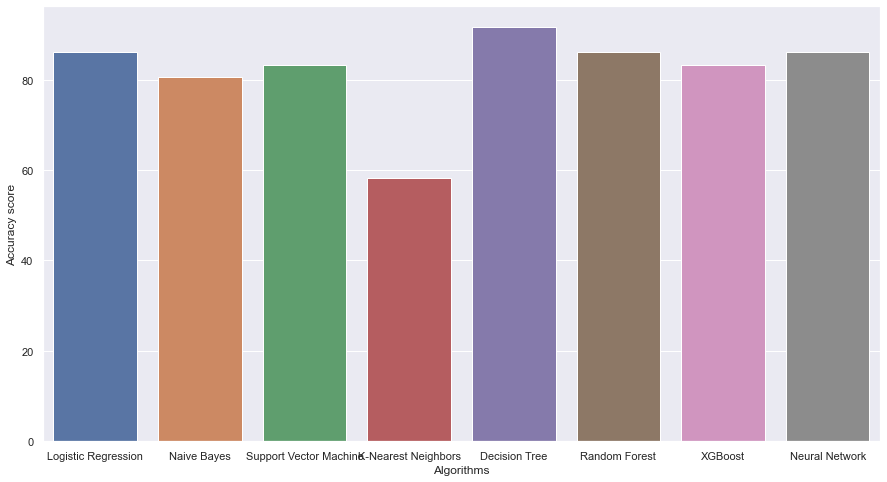

In [86]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

The Decision Tree algorithm gave the highest accuracy score of 91.67%